In [3]:
# pip install pydsm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 552 kB 7.5 MB/s 
  Created wheel for pydsm: filename=pydsm-0.14.0.0-cp37-cp37m-linux_x86_64.whl size=684722 sha256=4b29644fba3774be66f39f94041094b5feec411f9b6dd103d6e5d0f841812e5b
  Stored in directory: /root/.cache/pip/wheels/1d/37/8e/15939ed2fb3dcf8bbab167a0bf7c7155c2e6fa4df16d490260
Successfully built pydsm


In [4]:
import pydsm

In [41]:
N = 9
L = 2
nu_0 = -0.1

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
k = np.array(range(N))
x_k = np.ones(N)

In [9]:
X = pydsm.ft.dtft(x_k)

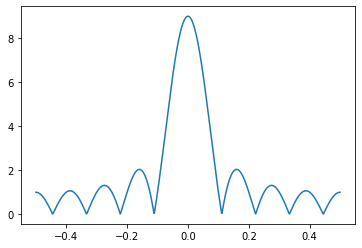

In [31]:
nu_range = np.linspace(-0.5, 0.5, 1000)
X_abs_range = np.array([abs(X(nu)) for nu in nu_range])
# X_arg_range = np.array([ for nu in nu_range])
X_arg_range = np.angle([X(nu) for nu in nu_range])

plt.plot(nu_range, X_abs_range)

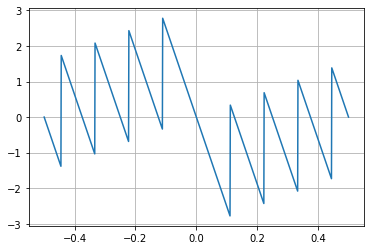

In [32]:
plt.plot(nu_range, X_arg_range)
plt.grid()

### Task 1.1 Compare with analitic equation!!!!

In [46]:
x_L = np.full((2*N + 1, ), 0.0)

for i in range(2*N + 1):
  if i%2:
    x_L[i] = 1

print(x_L)

[0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]


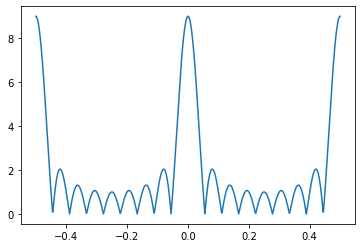

In [48]:
X = pydsm.ft.dtft(x_L)

nu_range = np.linspace(-0.5, 0.5, 1000)
X_abs_range = np.array([abs(X(nu)) for nu in nu_range])

plt.plot(nu_range, X_abs_range)

### Task 1.2 Compare with analitic equation!!!!

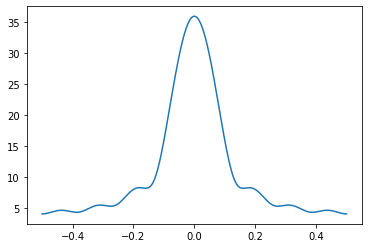

In [51]:
x_D = np.array([k for k in range(N)])

X = pydsm.ft.dtft(x_D)

nu_range = np.linspace(-0.5, 0.5, 1000)
X_abs_range = np.array([abs(X(nu)) for nu in nu_range])

plt.plot(nu_range, X_abs_range)

## Для выполнения задания **
# едиснтвенный вариант -- запрогать функцию самостоятельно,
# задать численную функцию и получить символьную производную
# перевести символьную функцию в реальную и построить график